In [7]:
# 필요한 모듈 임포트
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

Epoch 1/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.8343 - accuracy: 0.7585 - val_loss: 0.3950 - val_accuracy: 0.8879
Epoch 2/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.3668 - accuracy: 0.8945 - val_loss: 0.3243 - val_accuracy: 0.9081
Epoch 3/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.3118 - accuracy: 0.9103 - val_loss: 0.2758 - val_accuracy: 0.9228
Epoch 4/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.2773 - accuracy: 0.9209 - val_loss: 0.2519 - val_accuracy: 0.9291
Epoch 5/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.2529 - accuracy: 0.9276 - val_loss: 0.2322 - val_accuracy: 0.9346
Epoch 6/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.2334 - accuracy: 0.9333 - val_loss: 0.2207 - val_accuracy: 0.9369
Epoch 7/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.2192 - accuracy: 0.9370 - val_loss: 0.2097 - val_accuracy:

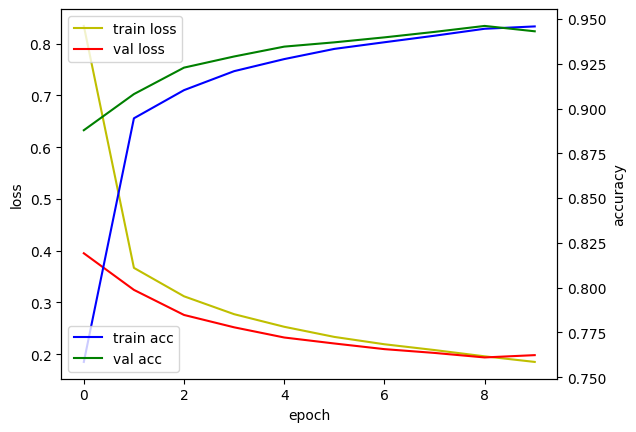

In [8]:
# MNIST 데이터셋 가져오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # 데이터 정규화
 
# tf.data를 사용하여 데이터셋을 섞고 배치 만들기
ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000)
train_size = int(len(x_train) * 0.7) # 학습셋:검증셋 = 7:3
train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).batch(20)
 
# MNIST 분류 모델 구성
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))
 
# 모델 생성
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
 
# 모델 학습
hist = model.fit(train_ds, validation_data=val_ds, epochs=10)
 
# 모델 평가
print('모델 평가')
model.evaluate(x_test, y_test)
 
# 모델 정보 출력
model.summary()
 
# 모델 저장
model.save('mnist_model.h5')
 
# 학습 결과 그래프 그리기
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 20)                15700     
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
313/313 - 0s - loss: 0.2160 - accuracy: 0.9383 - 320ms/epoch - 1ms/step


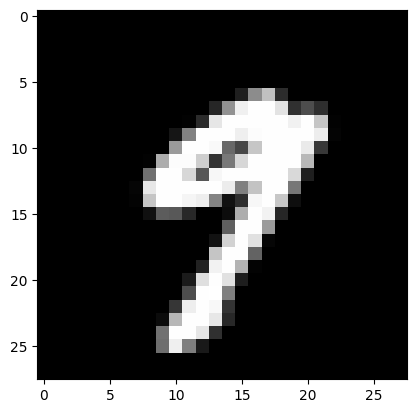

1/1 [==============================] - 0s 47ms/step
손글씨 이미지 예측값: [9]


In [14]:
#예제-6-2-코드
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
 
# MNIST 데이터셋 가져오기
_, (x_test, y_test) = mnist.load_data()
x_test = x_test / 255.0 # 데이터 정규화
 
# 모델 불러오기
model = load_model('mnist_model.h5')
model.summary()
model.evaluate(x_test, y_test, verbose=2)
 
# 테스트셋에서 20번째 이미지 출력
plt.imshow(x_test[20], cmap="gray")
plt.show()
 
# 테스트셋의 20번째 이미지 클래스 분류
picks = [20]
predictions = model.predict(x_test[picks])
predicted_classes = [np.argmax(pred) for pred in predictions]
print("손글씨 이미지 예측값:", predicted_classes)

Epoch 1/20
2100/2100 [==============================] - 3s 1ms/step - loss: 0.8435 - accuracy: 0.7545 - val_loss: 0.3707 - val_accuracy: 0.8936
Epoch 2/20
2100/2100 [==============================] - 3s 1ms/step - loss: 0.3531 - accuracy: 0.8976 - val_loss: 0.3012 - val_accuracy: 0.9129
Epoch 3/20
2100/2100 [==============================] - 3s 1ms/step - loss: 0.3014 - accuracy: 0.9130 - val_loss: 0.2770 - val_accuracy: 0.9200
Epoch 4/20
2100/2100 [==============================] - 3s 1ms/step - loss: 0.2729 - accuracy: 0.9223 - val_loss: 0.2572 - val_accuracy: 0.9264
Epoch 5/20
2100/2100 [==============================] - 3s 1ms/step - loss: 0.2510 - accuracy: 0.9274 - val_loss: 0.2350 - val_accuracy: 0.9330
Epoch 6/20
2100/2100 [==============================] - 3s 1ms/step - loss: 0.2332 - accuracy: 0.9340 - val_loss: 0.2160 - val_accuracy: 0.9395
Epoch 7/20
2100/2100 [==============================] - 3s 1ms/step - loss: 0.2185 - accuracy: 0.9379 - val_loss: 0.2027 - val_accuracy:

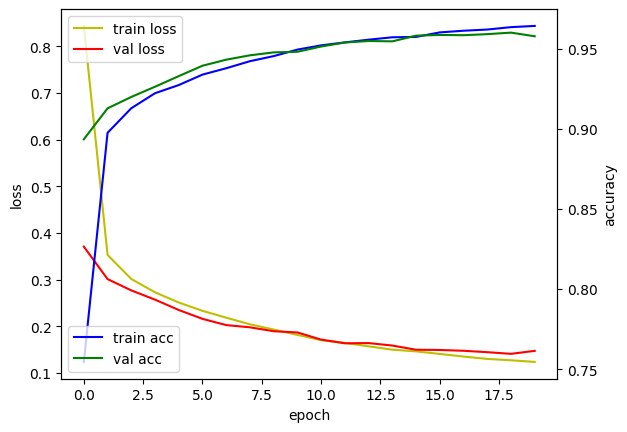

In [16]:
# MNIST 데이터셋 가져오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # 데이터 정규화
 
# tf.data를 사용하여 데이터셋을 섞고 배치 만들기
ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000)
train_size = int(len(x_train) * 0.7) # 학습셋:검증셋 = 7:3
train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).batch(20)
 
# MNIST 분류 모델 구성
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))
 
# 모델 생성
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
 
# 모델 학습
hist = model.fit(train_ds, validation_data=val_ds, epochs=20)
 
# 모델 평가
print('모델 평가')
model.evaluate(x_test, y_test)
 
# 모델 정보 출력
model.summary()
 
# 모델 저장
model.save('mnist_model_ep20.h5')
 
# 학습 결과 그래프 그리기
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

Epoch 1/5
2100/2100 [==============================] - 4s 1ms/step - loss: 0.4466 - accuracy: 0.8708 - val_loss: 0.2665 - val_accuracy: 0.9231
Epoch 2/5
2100/2100 [==============================] - 3s 1ms/step - loss: 0.2371 - accuracy: 0.9308 - val_loss: 0.1969 - val_accuracy: 0.9429
Epoch 3/5
2100/2100 [==============================] - 3s 1ms/step - loss: 0.1981 - accuracy: 0.9432 - val_loss: 0.1824 - val_accuracy: 0.9501
Epoch 4/5
2100/2100 [==============================] - 3s 1ms/step - loss: 0.1740 - accuracy: 0.9497 - val_loss: 0.1800 - val_accuracy: 0.9476
Epoch 5/5
2100/2100 [==============================] - 3s 1ms/step - loss: 0.1561 - accuracy: 0.9544 - val_loss: 0.1664 - val_accuracy: 0.9513
모델 평가
313/313 [==============================] - 0s 848us/step - loss: 0.1787 - accuracy: 0.9464
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None

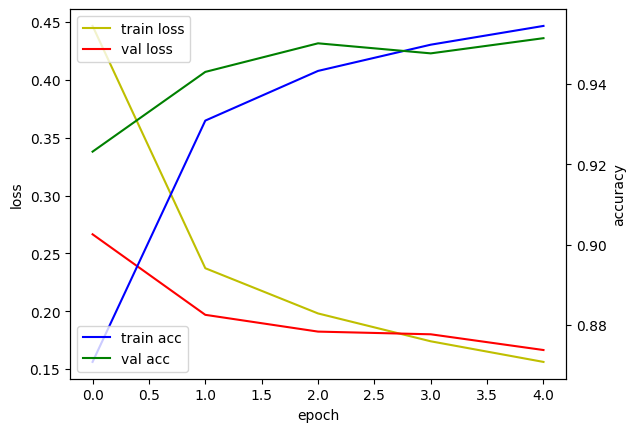

In [17]:
# MNIST 데이터셋 가져오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # 데이터 정규화
 
# tf.data를 사용하여 데이터셋을 섞고 배치 만들기
ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000)
train_size = int(len(x_train) * 0.7) # 학습셋:검증셋 = 7:3
train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).batch(20)
 
# MNIST 분류 모델 구성
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))
 
# 모델 생성
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
 
# 모델 학습
hist = model.fit(train_ds, validation_data=val_ds, epochs=5)
 
# 모델 평가
print('모델 평가')
model.evaluate(x_test, y_test)
 
# 모델 정보 출력
model.summary()
 
# 모델 저장
model.save('mnist_model_adam.h5')
 
# 학습 결과 그래프 그리기
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 20)                15700     
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
313/313 - 0s - loss: 0.2160 - accuracy: 0.9383 - 318ms/epoch - 1ms/step
x_test 갯수 :  10000


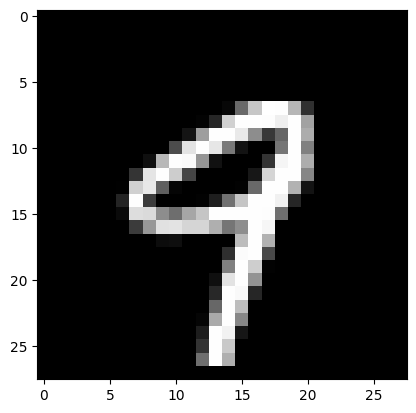

1/1 [==============================] - 0s 44ms/step
손글씨 이미지 예측값: [9]


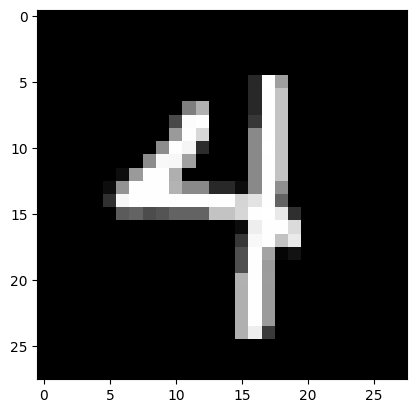

1/1 [==============================] - 0s 19ms/step
손글씨 이미지 예측값: [4]


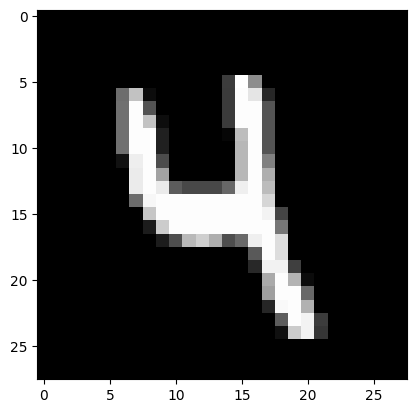

1/1 [==============================] - 0s 17ms/step
손글씨 이미지 예측값: [4]


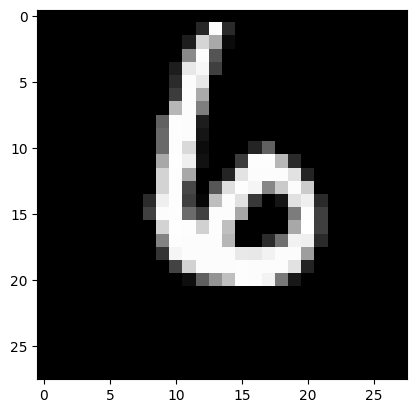

1/1 [==============================] - 0s 17ms/step
손글씨 이미지 예측값: [6]


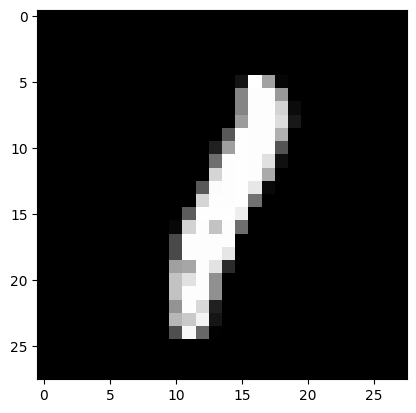

1/1 [==============================] - 0s 18ms/step
손글씨 이미지 예측값: [1]


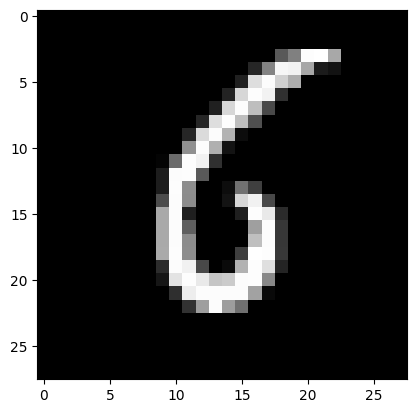

1/1 [==============================] - 0s 16ms/step
손글씨 이미지 예측값: [6]


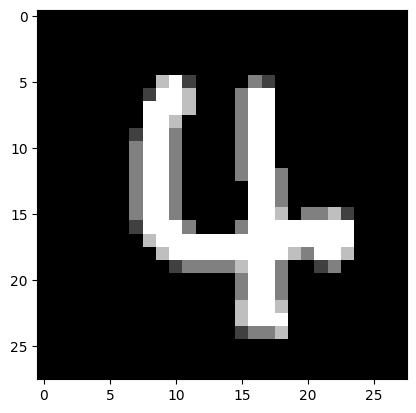

1/1 [==============================] - 0s 25ms/step
손글씨 이미지 예측값: [4]


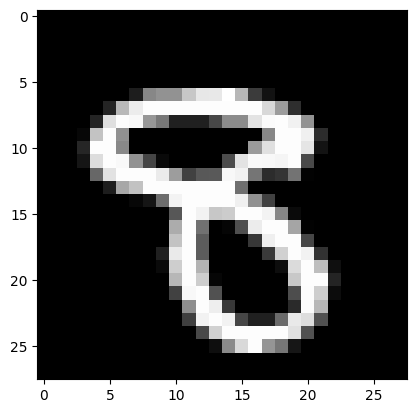

1/1 [==============================] - 0s 17ms/step
손글씨 이미지 예측값: [8]


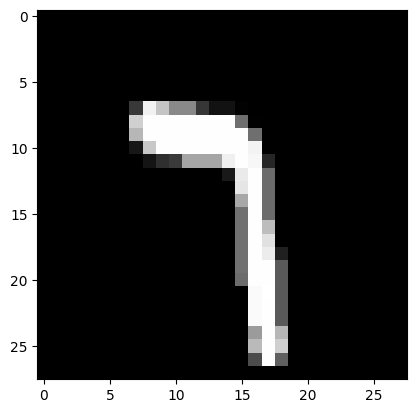

1/1 [==============================] - 0s 18ms/step
손글씨 이미지 예측값: [7]


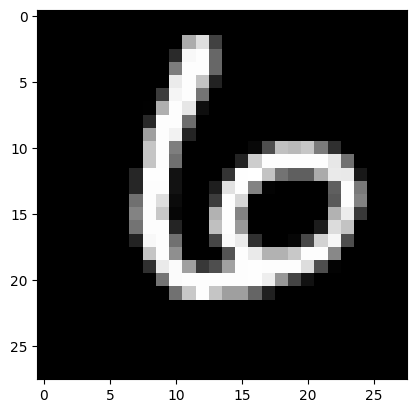

1/1 [==============================] - 0s 17ms/step
손글씨 이미지 예측값: [6]


In [26]:
#예제-6-2-코드
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import random
 
# MNIST 데이터셋 가져오기
_, (x_test, y_test) = mnist.load_data()
x_test = x_test / 255.0 # 데이터 정규화
 
# 모델 불러오기
model = load_model('mnist_model.h5')
model.summary()
model.evaluate(x_test, y_test, verbose=2)
 
print("x_test 갯수 : ",len(x_test))
for i in range(10):
    random_int = random.randint(0,10000)
    plt.imshow(x_test[random_int], cmap="gray")
    plt.show()
    picks = [random_int]
    predictions = model.predict(x_test[picks])
    predicted_classes = [np.argmax(pred) for pred in predictions]
    print("손글씨 이미지 예측값:", predicted_classes)
 

# 입력층(1), 은닉층(1), 출력층(1)

Epoch 1/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.4068 - accuracy: 0.8863 - val_loss: 0.2486 - val_accuracy: 0.9286
Epoch 2/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.2422 - accuracy: 0.9308 - val_loss: 0.2109 - val_accuracy: 0.9387
Epoch 3/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.2056 - accuracy: 0.9403 - val_loss: 0.1949 - val_accuracy: 0.9476
Epoch 4/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.1837 - accuracy: 0.9459 - val_loss: 0.1784 - val_accuracy: 0.9484
Epoch 5/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.1660 - accuracy: 0.9514 - val_loss: 0.1789 - val_accuracy: 0.9498
Epoch 6/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.1559 - accuracy: 0.9541 - val_loss: 0.1650 - val_accuracy: 0.9530
Epoch 7/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.1452 - accuracy: 0.9562 - val_loss: 0.1620 - val_accuracy:

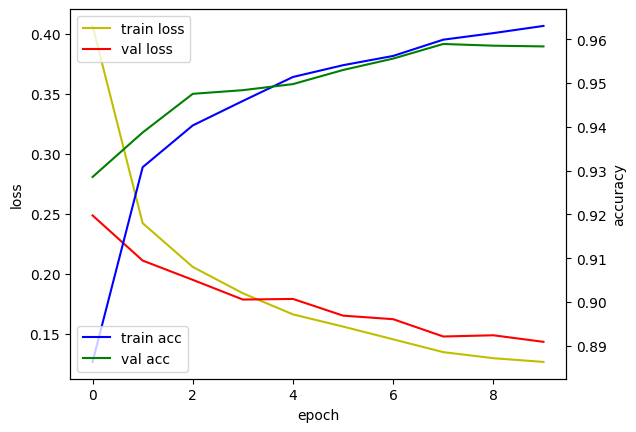

In [33]:
# MNIST 데이터셋 가져오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # 데이터 정규화
 
# tf.data를 사용하여 데이터셋을 섞고 배치 만들기
ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000)
train_size = int(len(x_train) * 0.7) # 학습셋:검증셋 = 7:3
train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).batch(20)
 
# MNIST 분류 모델 구성
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))    # 입력층
model.add(Dense(20, activation='relu'))     # 은닉층
model.add(Dense(10, activation='softmax'))  # 출력층
 
# 모델 생성
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
 
# 모델 학습
hist = model.fit(train_ds, validation_data=val_ds, epochs=10)
 
# 모델 평가
print('모델 평가')
model.evaluate(x_test, y_test)
 
# 모델 정보 출력
model.summary()
 
# 모델 저장
model.save('mnist_model_adam_add1.h5')
 
# 학습 결과 그래프 그리기
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

# 입력층(1), 은닉층(3), 출력층(1)

Epoch 1/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.4315 - accuracy: 0.8730 - val_loss: 0.2409 - val_accuracy: 0.9296
Epoch 2/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.2257 - accuracy: 0.9336 - val_loss: 0.1862 - val_accuracy: 0.9446
Epoch 3/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.1770 - accuracy: 0.9465 - val_loss: 0.1741 - val_accuracy: 0.9480
Epoch 4/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.1554 - accuracy: 0.9543 - val_loss: 0.1724 - val_accuracy: 0.9487
Epoch 5/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.1390 - accuracy: 0.9577 - val_loss: 0.1429 - val_accuracy: 0.9573
Epoch 6/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.1276 - accuracy: 0.9621 - val_loss: 0.1429 - val_accuracy: 0.9577
Epoch 7/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.1149 - accuracy: 0.9647 - val_loss: 0.1337 - val_accuracy:

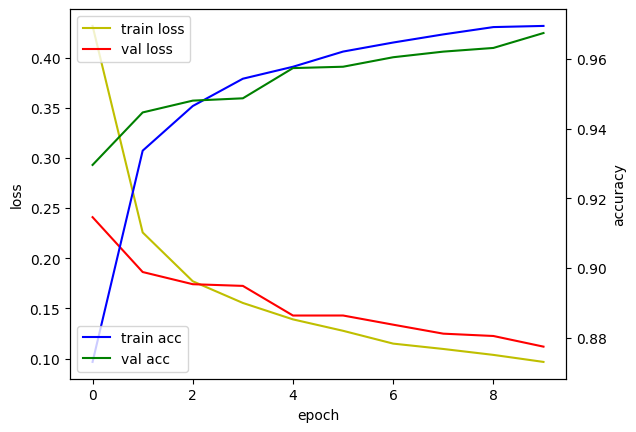

In [34]:
# MNIST 데이터셋 가져오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # 데이터 정규화
 
# tf.data를 사용하여 데이터셋을 섞고 배치 만들기
ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000)
train_size = int(len(x_train) * 0.7) # 학습셋:검증셋 = 7:3
train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).batch(20)
 
# MNIST 분류 모델 구성
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))    # 입력층
model.add(Dense(20, activation='relu'))     # 은닉층
model.add(Dense(20, activation='relu'))     # 은닉층
model.add(Dense(20, activation='relu'))     # 은닉층
model.add(Dense(10, activation='softmax'))  # 출력층
 
# 모델 생성
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
 
# 모델 학습
hist = model.fit(train_ds, validation_data=val_ds, epochs=10)
 
# 모델 평가
print('모델 평가')
model.evaluate(x_test, y_test)
 
# 모델 정보 출력
model.summary()
 
# 모델 저장
model.save('mnist_model_adam_add3.h5')
 
# 학습 결과 그래프 그리기
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

# 입력층(1), 은닉층(5), 출력층(1)

Epoch 1/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.5254 - accuracy: 0.8324 - val_loss: 0.2452 - val_accuracy: 0.9301
Epoch 2/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.2296 - accuracy: 0.9331 - val_loss: 0.2072 - val_accuracy: 0.9394
Epoch 3/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.1862 - accuracy: 0.9446 - val_loss: 0.1703 - val_accuracy: 0.9521
Epoch 4/10
2100/2100 [==============================] - 3s 2ms/step - loss: 0.1593 - accuracy: 0.9525 - val_loss: 0.1542 - val_accuracy: 0.9544
Epoch 5/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.1431 - accuracy: 0.9571 - val_loss: 0.1453 - val_accuracy: 0.9581
Epoch 6/10
2100/2100 [==============================] - 3s 2ms/step - loss: 0.1348 - accuracy: 0.9591 - val_loss: 0.1379 - val_accuracy: 0.9588
Epoch 7/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.1251 - accuracy: 0.9618 - val_loss: 0.1430 - val_accuracy:

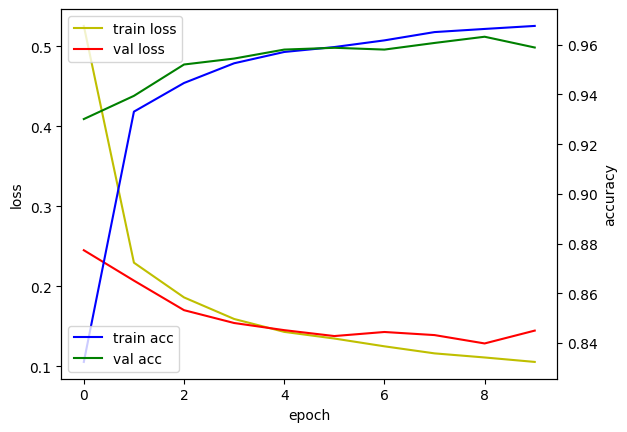

In [66]:
# MNIST 데이터셋 가져오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # 데이터 정규화
 
# tf.data를 사용하여 데이터셋을 섞고 배치 만들기
ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000)
train_size = int(len(x_train) * 0.7) # 학습셋:검증셋 = 7:3
train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).batch(20)
 
# MNIST 분류 모델 구성
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))    # 입력층
model.add(Dense(20, activation='relu'))     # 은닉층
model.add(Dense(20, activation='relu'))     # 은닉층
model.add(Dense(20, activation='relu'))     # 은닉층
model.add(Dense(20, activation='relu'))     # 은닉층
model.add(Dense(20, activation='relu'))     # 은닉층
model.add(Dense(10, activation='softmax'))  # 출력층
 
# 모델 생성
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
 
# 모델 학습
hist = model.fit(train_ds, validation_data=val_ds, epochs=10)
 
# 모델 평가
print('모델 평가')
model.evaluate(x_test, y_test)
 
# 모델 정보 출력
model.summary()
 
# 모델 저장
model.save('mnist_model_adam_add5.h5')
 
# 학습 결과 그래프 그리기
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

# 76일차 실습2

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_83 (Dense)            (None, 20)                15700     
                                                                 
 dense_84 (Dense)            (None, 20)                420       
                                                                 
 dense_85 (Dense)            (None, 20)                420       
                                                                 
 dense_86 (Dense)            (None, 20)                420       
                                                                 
 dense_87 (Dense)            (None, 20)                420       
                                                                 
 dense_88 (Dense)            (None, 10)              

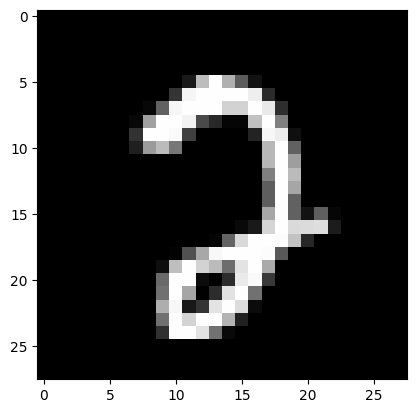

1/1 [==============================] - 0s 60ms/step
손글씨 이미지 예측값: [2]
7572


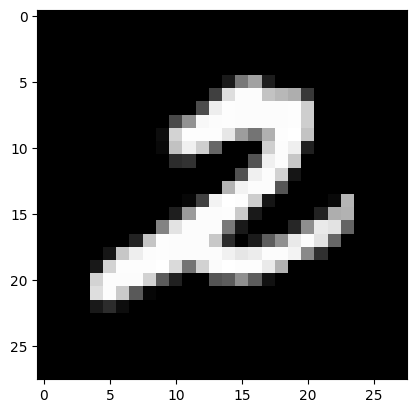

1/1 [==============================] - 0s 17ms/step
손글씨 이미지 예측값: [2]
9678


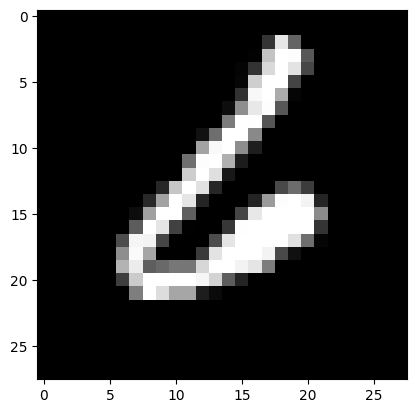

1/1 [==============================] - 0s 18ms/step
손글씨 이미지 예측값: [6]
9875


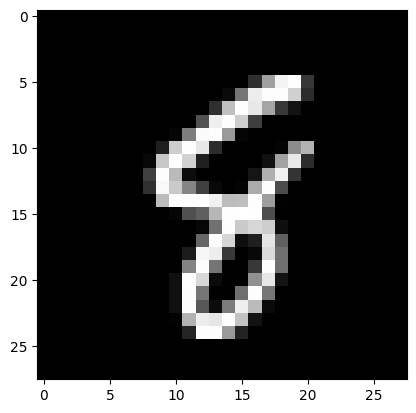

1/1 [==============================] - 0s 17ms/step
손글씨 이미지 예측값: [8]
8087


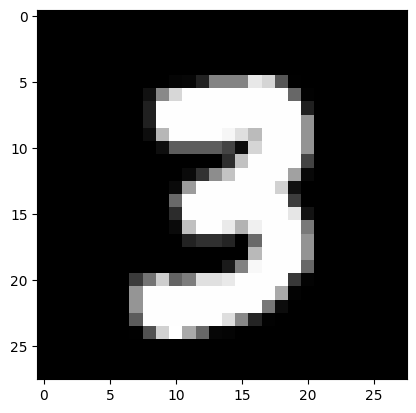

1/1 [==============================] - 0s 17ms/step
손글씨 이미지 예측값: [3]
7582


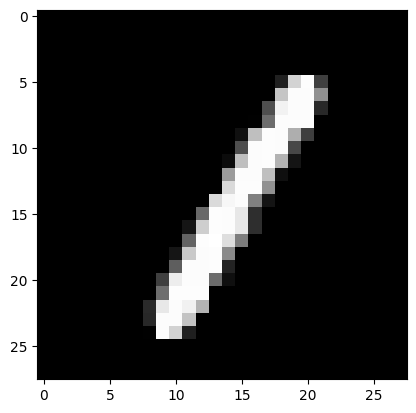

1/1 [==============================] - 0s 17ms/step
손글씨 이미지 예측값: [1]
4339


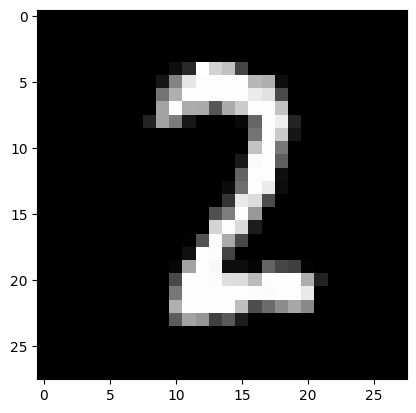

1/1 [==============================] - 0s 17ms/step
손글씨 이미지 예측값: [2]
8618


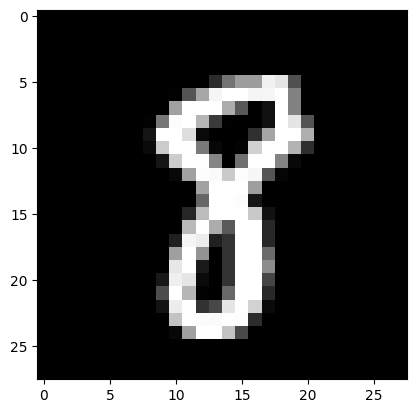

1/1 [==============================] - 0s 17ms/step
손글씨 이미지 예측값: [8]
609


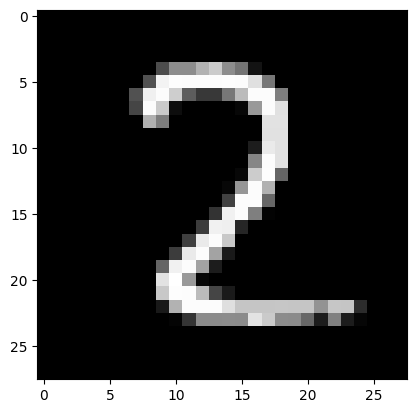

1/1 [==============================] - 0s 16ms/step
손글씨 이미지 예측값: [2]
91


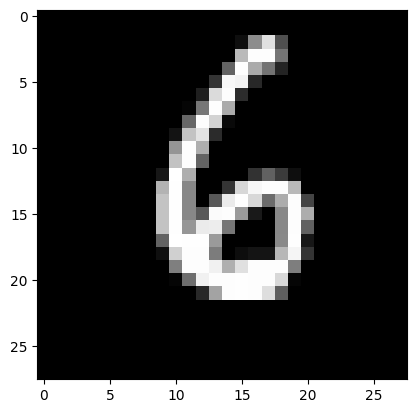

1/1 [==============================] - 0s 17ms/step
손글씨 이미지 예측값: [6]


In [67]:
#예제-6-2-코드
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import random
 
# MNIST 데이터셋 가져오기
_, (x_test, y_test) = mnist.load_data()
x_test = x_test / 255.0 # 데이터 정규화
 
# 모델 불러오기
model = load_model('mnist_model_adam_add5.h5')
model.summary()
model.evaluate(x_test, y_test, verbose=2)
 
print("x_test 갯수 : ",len(x_test))
for i in range(10):
    random_int = random.randint(0,10000)
    plt.imshow(x_test[random_int], cmap="gray")
    # plt.imshow(x_test[8], cmap="gray")
    print(random_int)
    plt.show()
    picks = [random_int]
    # picks = [8]
    predictions = model.predict(x_test[picks])
    predicted_classes = [np.argmax(pred) for pred in predictions]
    print("손글씨 이미지 예측값:", predicted_classes)
    print("="*50)
 